<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import os 

import itertools
from collections import Counter
from os.path import isfile, join
from random import randint, shuffle
import itertools
import warnings
warnings.filterwarnings("ignore")

#import weka.core.jvm as jvm
#from weka.classifiers import Classifier, Evaluation, PredictionOutput
#from weka.core.converters import Loader
#from weka.core.classes import Random
#from weka.filters import Filter
#from weka.core.dataset import Instances
#jvm.start(packages=True)
import time

from IPython.display import display, HTML

In [2]:
collections = ['TREC3', 'TREC5', 'TREC6','TREC7', 'AH99', 'TREC2001' ]

In [ ]:
# merge se serve

In [15]:
arg_instances = []
for collection_eval in collections:
    for others_coll in collections:
        arg_instances.append(   (collection_eval, [others_coll])    )
        arg_instances.append(   (others_coll, [collection_eval])    )
    
print(arg_instances)

for i, (collection_eval, others_coll) in enumerate(arg_instances):
    #print(collection_eval, others_coll)
    sub = pd.read_pickle('../_pickles/partial/train{}-eval{}-algTCAk-SVMRBF.pickle'.format(others_coll[0], collection_eval))
    
    if i==0:
        dfres = pd.DataFrame(columns=sub.columns)
        
    dfres = pd.concat([dfres,sub])
    #display(sub)
    
dfres.to_pickle('../_pickles/TLNEW.pickle')
display(dfres)

[('TREC3', ['TREC3']), ('TREC3', ['TREC3']), ('TREC3', ['TREC5']), ('TREC5', ['TREC3']), ('TREC3', ['TREC6']), ('TREC6', ['TREC3']), ('TREC3', ['TREC7']), ('TREC7', ['TREC3']), ('TREC3', ['AH99']), ('AH99', ['TREC3']), ('TREC3', ['TREC2001']), ('TREC2001', ['TREC3']), ('TREC5', ['TREC3']), ('TREC3', ['TREC5']), ('TREC5', ['TREC5']), ('TREC5', ['TREC5']), ('TREC5', ['TREC6']), ('TREC6', ['TREC5']), ('TREC5', ['TREC7']), ('TREC7', ['TREC5']), ('TREC5', ['AH99']), ('AH99', ['TREC5']), ('TREC5', ['TREC2001']), ('TREC2001', ['TREC5']), ('TREC6', ['TREC3']), ('TREC3', ['TREC6']), ('TREC6', ['TREC5']), ('TREC5', ['TREC6']), ('TREC6', ['TREC6']), ('TREC6', ['TREC6']), ('TREC6', ['TREC7']), ('TREC7', ['TREC6']), ('TREC6', ['AH99']), ('AH99', ['TREC6']), ('TREC6', ['TREC2001']), ('TREC2001', ['TREC6']), ('TREC7', ['TREC3']), ('TREC3', ['TREC7']), ('TREC7', ['TREC5']), ('TREC5', ['TREC7']), ('TREC7', ['TREC6']), ('TREC6', ['TREC7']), ('TREC7', ['TREC7']), ('TREC7', ['TREC7']), ('TREC7', ['AH99'])

,train_on,eval_on,improve_kind,kind,df
0,TREC3,TREC3,Base,k-SVMRBF,actual predicted system topic ac...
0,TREC3,TREC3,Base,k-SVMRBF,actual predicted system topic ac...
0,TREC5,TREC3,Base,k-SVMRBF,actual predicted system topic ac...
0,TREC3,TREC5,Base,k-SVMRBF,actual predicted system topic CL...
0,TREC6,TREC3,Base,k-SVMRBF,actual predicted system topic ac...
0,TREC3,TREC6,Base,k-SVMRBF,actual predicted system topi...
0,TREC7,TREC3,Base,k-SVMRBF,actual predicted system topic ac...
0,TREC3,TREC7,Base,k-SVMRBF,actual predicted system topi...
0,AH99,TREC3,Base,k-SVMRBF,actual predicted system topic ac...
0,TREC3,AH99,Base,k-SVMRBF,actual predicted system topic ...


In [ ]:
## plot

In [19]:
import scipy.stats

df = pd.DataFrame(columns=['train_on', 'eval_on', 'algorithm' ,'apmap', 'kindcorr', 'corr'])

df_result = pd.read_pickle('../_pickles/TLNEW.pickle')
df_onetrain =  pd.read_pickle('../_pickles/singletrain/singletrain-k-LR.pickle')

#display(df_result.head())
#display(df_onetrain.head())

meth_algorithms = np.unique(df_result['kind'])



for COLLECTION_TRAIN in collections:
    evals = [item for item in collections if item!=COLLECTION_TRAIN]
    for COLLECTION_EVAL  in evals: 
        for alg in meth_algorithms:
            k_alg = 'k-LR'
            
            print("{}--{}--{}".format(COLLECTION_TRAIN, COLLECTION_EVAL, alg))
            
            aux = df_result[(df_result['train_on']==COLLECTION_TRAIN)
                            &(df_result['eval_on']==COLLECTION_EVAL)
                            &(df_result['kind']==alg)
                           ]['df'].values[0]
            
            aux_singletrain = df_onetrain[(df_onetrain['train_on']==COLLECTION_TRAIN)
                            &(df_onetrain['eval_on']==COLLECTION_EVAL)
                            &(df_onetrain['kind']==k_alg)
                           ]['df'].values[0]
            
            #display(aux)
            #display(aux_singletrain)
            #assert False
            
            # AP
            x = aux['actual']
            y = aux['predicted']
            rho = sp.stats.pearsonr(x,y)[0]
            tau = sp.stats.kendalltau(x,y)[0]
            rs = sp.stats.spearmanr(x,y)[0]
            df.loc[len(df)] = [COLLECTION_TRAIN, COLLECTION_EVAL, alg, 'ap', 'rho', rho ]
            df.loc[len(df)] = [COLLECTION_TRAIN, COLLECTION_EVAL, alg, 'ap', 'tau', tau ]
            df.loc[len(df)] = [COLLECTION_TRAIN, COLLECTION_EVAL, alg, 'ap', 'rs', rs ]
            
            # MAP
            x = aux.pivot('system', 'topic', 'actual').mean(1).values
            y = aux.pivot('system', 'topic', 'predicted').mean(1).values
            #rho = sp.stats.pearsonr(x,y)[0]
            tau = sp.stats.kendalltau(x,y)[0]
            #rs = sp.stats.spearmanr(x,y)[0]
            #df.loc[len(df)] = [COLLECTION_TRAIN, COLLECTION_EVAL, alg, 'map', 'rho', rho ]
            df.loc[len(df)] = [COLLECTION_TRAIN, COLLECTION_EVAL, alg, 'map', 'tau', tau ]
            
            # AAP
            x = aux.pivot('system', 'topic', 'actual').mean(0).values
            y = aux.pivot('system', 'topic', 'predicted').mean(0).values
            rho = sp.stats.pearsonr(x,y)[0]
            tau = sp.stats.kendalltau(x,y)[0]
            df.loc[len(df)] = [COLLECTION_TRAIN, COLLECTION_EVAL, alg, 'aap', 'rho', rho ]
            df.loc[len(df)] = [COLLECTION_TRAIN, COLLECTION_EVAL, alg, 'aap', 'tau', tau ]
            
            #################################################################################
            
            # AP
            x = aux_singletrain['actual']
            y = aux_singletrain['predicted']
            rho = sp.stats.pearsonr(x,y)[0]
            tau = sp.stats.kendalltau(x,y)[0]
            rs = sp.stats.spearmanr(x,y)[0]
            df.loc[len(df)] = [COLLECTION_TRAIN, COLLECTION_EVAL, k_alg, 'ap', 'rho', rho ]
            df.loc[len(df)] = [COLLECTION_TRAIN, COLLECTION_EVAL, k_alg, 'ap', 'tau', tau ]
            df.loc[len(df)] = [COLLECTION_TRAIN, COLLECTION_EVAL, k_alg, 'ap', 'rs', rs ]
            
            # MAP
            x = aux_singletrain.pivot('system', 'topic', 'actual').mean(1).values
            y = aux_singletrain.pivot('system', 'topic', 'predicted').mean(1).values
            #rho = sp.stats.pearsonr(x,y)[0]
            tau = sp.stats.kendalltau(x,y)[0]
            #rs = sp.stats.spearmanr(x,y)[0]
            #df.loc[len(df)] = [COLLECTION_TRAIN, COLLECTION_EVAL, alg, 'map', 'rho', rho ]
            df.loc[len(df)] = [COLLECTION_TRAIN, COLLECTION_EVAL, k_alg, 'map', 'tau', tau ]
            
            # AAP
            x = aux_singletrain.pivot('system', 'topic', 'actual').mean(0).values
            y = aux_singletrain.pivot('system', 'topic', 'predicted').mean(0).values
            rho = sp.stats.pearsonr(x,y)[0]
            tau = sp.stats.kendalltau(x,y)[0]
            df.loc[len(df)] = [COLLECTION_TRAIN, COLLECTION_EVAL, k_alg, 'aap', 'rho', rho ]
            df.loc[len(df)] = [COLLECTION_TRAIN, COLLECTION_EVAL, k_alg, 'aap', 'tau', tau ]
            

#df['mode'] = [x.split('_')[1] if x != k_alg else x for x in df['algorithm']]
display(df.head())

TREC3--TREC5--k-SVMRBF
TREC3--TREC6--k-SVMRBF
TREC3--TREC7--k-SVMRBF
TREC3--AH99--k-SVMRBF
TREC3--TREC2001--k-SVMRBF
TREC5--TREC3--k-SVMRBF
TREC5--TREC6--k-SVMRBF
TREC5--TREC7--k-SVMRBF
TREC5--AH99--k-SVMRBF
TREC5--TREC2001--k-SVMRBF
TREC6--TREC3--k-SVMRBF
TREC6--TREC5--k-SVMRBF
TREC6--TREC7--k-SVMRBF
TREC6--AH99--k-SVMRBF
TREC6--TREC2001--k-SVMRBF
TREC7--TREC3--k-SVMRBF
TREC7--TREC5--k-SVMRBF
TREC7--TREC6--k-SVMRBF
TREC7--AH99--k-SVMRBF
TREC7--TREC2001--k-SVMRBF
AH99--TREC3--k-SVMRBF
AH99--TREC5--k-SVMRBF
AH99--TREC6--k-SVMRBF
AH99--TREC7--k-SVMRBF
AH99--TREC2001--k-SVMRBF
TREC2001--TREC3--k-SVMRBF
TREC2001--TREC5--k-SVMRBF
TREC2001--TREC6--k-SVMRBF
TREC2001--TREC7--k-SVMRBF
TREC2001--AH99--k-SVMRBF


,train_on,eval_on,algorithm,apmap,kindcorr,corr
0,TREC3,TREC5,k-SVMRBF,ap,rho,0.098379
1,TREC3,TREC5,k-SVMRBF,ap,tau,0.024083
2,TREC3,TREC5,k-SVMRBF,ap,rs,0.029492
3,TREC3,TREC5,k-SVMRBF,map,tau,-0.102980
4,TREC3,TREC5,k-SVMRBF,aap,rho,0.336067


In [20]:
import seaborn as sns
import pylab as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib
%matplotlib inline
sns.set_style('whitegrid')

AH99--ap--rho


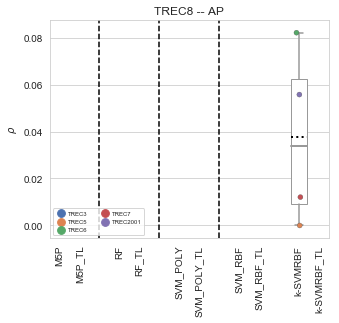

AssertionError: 

In [27]:
trains = np.unique(df['train_on'])

for t in trains:
    sub = df[df['train_on']==t]
    apmaps  = np.unique(sub['apmap'])
    for apmap in apmaps:
        sub2 = sub[sub['apmap']==apmap]
        kindcorrs = np.unique(sub2['kindcorr'])
        for kindcorr in kindcorrs:
            if (((apmap=='ap') & (kindcorr=='rho'))) :# | ((apmap=='aap') & (kindcorr=='rho')) | ((apmap=='map') & (kindcorr=='tau')) ):
                print("{}--{}--{}".format(t,apmap,kindcorr))
                sub3 = sub2[sub2['kindcorr']==kindcorr]

                
                sub3.loc[len(sub3)] = [np.nan, np.nan,'blank',np.nan, np.nan , np.nan]
                sub3['x'] = [x if 'TL' in x else x.rsplit('_',1)[0] for x in sub3['algorithm']]
                #sub3['x'] = sub3['algorithm']
                #display(sub3.head(10))
                
                

                fig = plt.figure(figsize=(5,4))
                pages = PdfPages('../../plots/TCA/TCA3{}_{}_TrainOn{}.pdf'.format(apmap, kindcorr, t.replace('AH99', 'TREC8')))
                jitter = .3
                alpha = .99
                linewidth = .3
                size = 5
                meanp = dict(linestyle=':', linewidth=2, color='#000000')
                medianp = dict(linestyle='-', linewidth=2, color='#999999')
                boxp = dict(linestyle='-', linewidth=1, )

                #orr = [ 'M5P', 'M5P_TL', 'blank',
                #        'RF', 'RF_TL', 'blank',
                #        'SVM_POLY', 'SVM_POLY_TL','blank',
                #        'SVM_RBF', 'SVM_RBF_TL', 'blank',
                #       'k-SVMRBF', 'k-SVMRBF_TL',
                #        ]


                ax = sns.boxplot(x="x", y="corr", data=sub3,
                                 color='#FFFFFF',
                                 showmeans=True, meanline = True, meanprops = meanp, medianprops = medianp, boxprops =  boxp, order=orr
                                )


                ax = sns.stripplot(x="x", y="corr", hue='eval_on',
                                       data=sub3, palette='deep',
                               jitter=jitter, alpha=alpha, linewidth=linewidth, size=size, marker = 'o', order=orr
                                      )

                xposition = [2, 5, 8 ]
                for xc in xposition:
                    plt.axvline(x=xc, color='k', linestyle='--')


                labs = [x.get_text() for x in ax.get_xticklabels()]
                labs = [x if ('blank' not in x) else '' for x in labs]
                ax.set_xticklabels(labs, rotation=90)  

                #ax.legend(bbox_to_anchor=(1, 1.), ncol=1, prop={'size': 8}, handletextpad=0.1, frameon=True)
                ax.legend(loc='lower left', ncol=2, prop={'size': 6}, handletextpad=0.1, frameon=True)

                ax.set(title = '{} -- {}'.format(t.replace('AH99', 'TREC8'), apmap.upper()),
                       ylabel = r"$\{}$".format(kindcorr),
                       xlabel = ""
                      )


                pages.savefig(bbox_inches='tight');pages.close()
                #plt.close()
                plt.show()

                
                assert False